In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

### [Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.


In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Plotting distribution of a numerical variable:

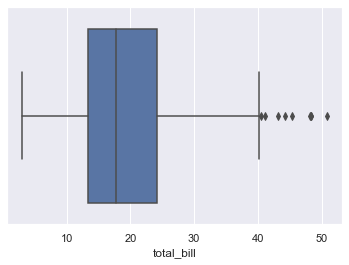

In [3]:
sns.boxplot(x = tips['total_bill']); # Plotting the numerical variable on x-axis

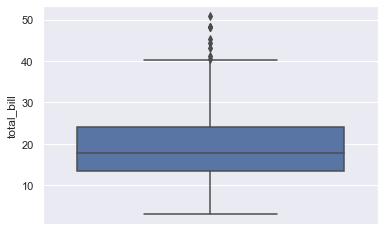

In [4]:
sns.boxplot(y = tips['total_bill']); # Plotting the numerical variable on y-axis

#### Draw a vertical boxplot grouped by a categorical variable:

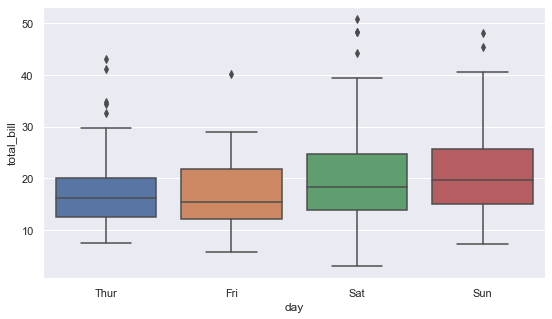

In [5]:
plt.figure(figsize=(9,5))
sns.boxplot(data = tips, x = 'day', y = 'total_bill');

#### Draw a boxplot with nested grouping by two categorical variables:

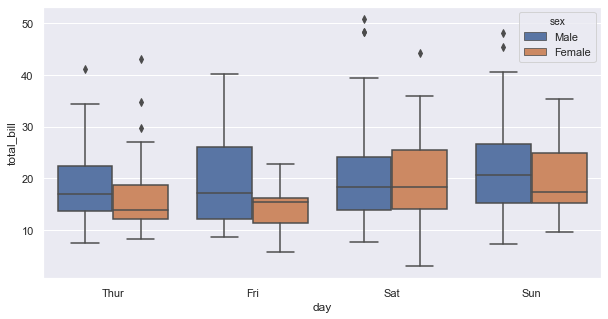

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex');

#### Draw a boxplot with nested grouping when some bins are empty:

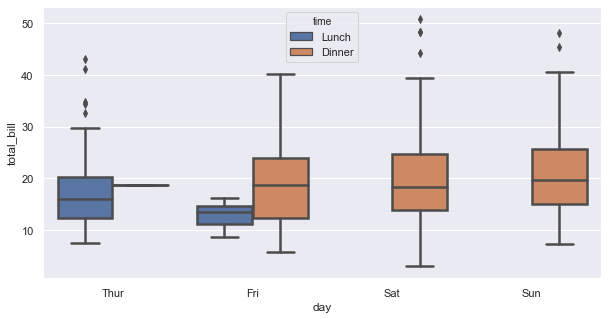

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(x="day", y="total_bill", hue="time", data=tips, linewidth=2.5);

#### Control box order by passing an explicit order:

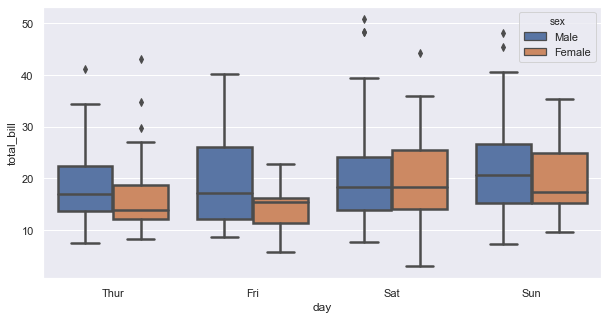

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, linewidth=2.5, order = ['Thur', 'Fri', 'Sat', 'Sun']);

#### Draw a boxplot for each numeric variable in a DataFrame:

In [9]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


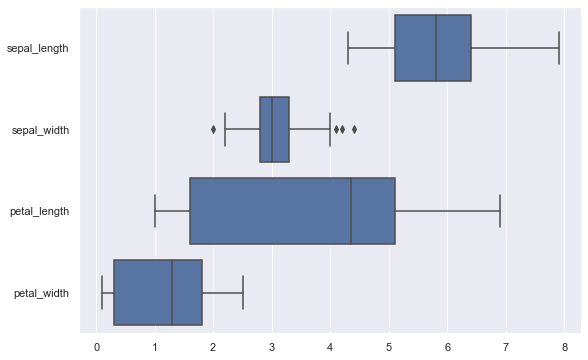

In [10]:
plt.figure(figsize=(9,6))
sns.boxplot(data=iris, orient="h", color = 'b');

Observe when `hue` was used in the above examples a the box positions and widths changed.

Use `hue` without changing box position or width:

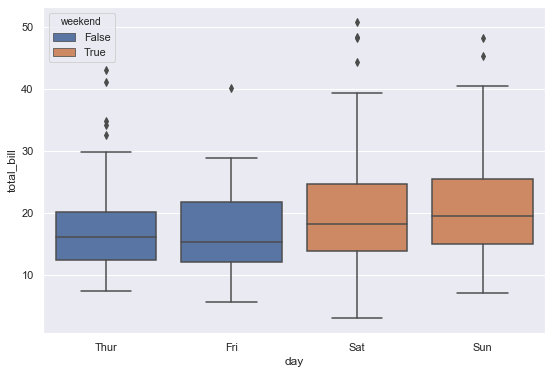

In [11]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
plt.figure(figsize=(9,6))
sns.boxplot(data = tips, x = 'day', y = 'total_bill', hue = 'weekend', dodge = False);

#### Use `swarmplot()` to show the datapoints on top of the boxes:

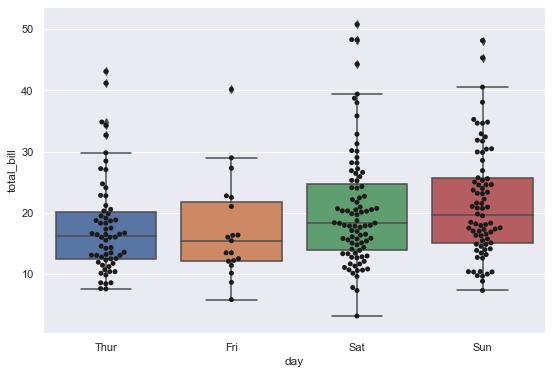

In [12]:
plt.figure(figsize=(9,6))
g = sns.boxplot(x="day", y="total_bill", data=tips)
g = sns.swarmplot(x="day", y="total_bill", data=tips, color="k");

Use [catplot()](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot) to combine a [pointplot()](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) and a [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid). This allows grouping within additional categorical variables. Using __catplot()__ is safer than using __FacetGrid__ directly, as it ensures synchronization of variable order across facets:

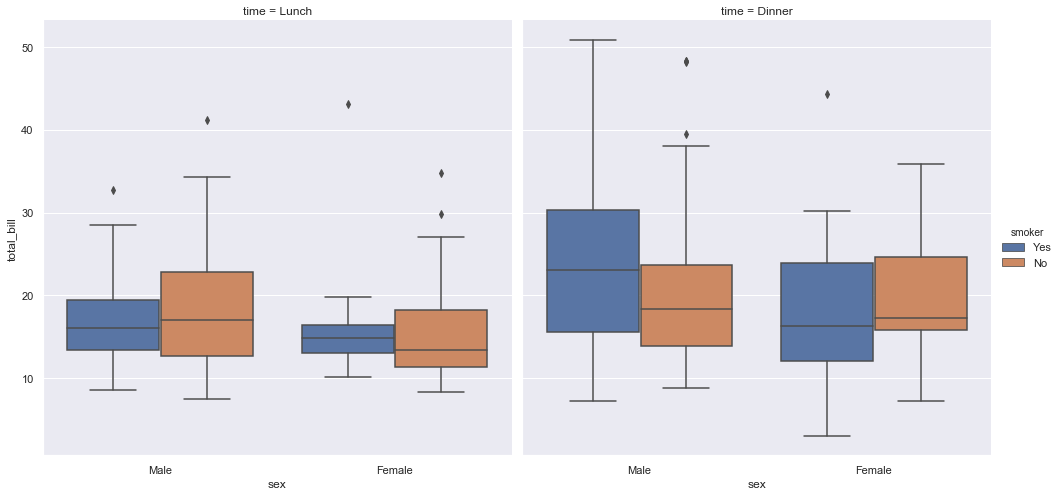

In [13]:
g = sns.catplot(x = "sex", y="total_bill", hue="smoker", col="time", data=tips, kind="box", height=7, aspect=1)